In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679
Accuracy: 0.9736842105263158


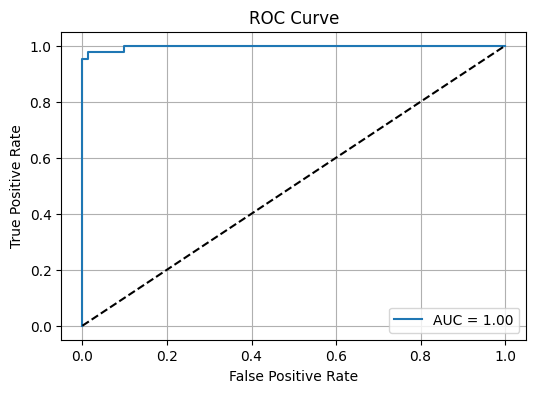

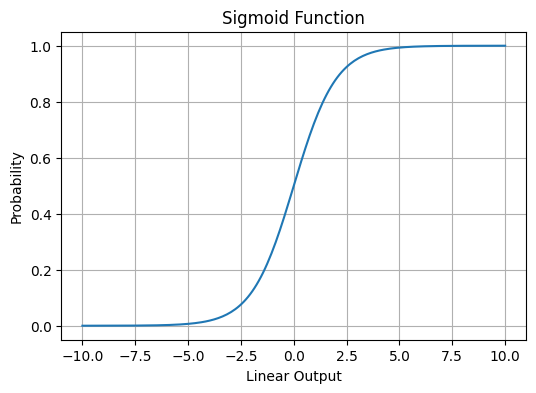

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

# 1. Load dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# 2. Drop ID column if present
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'Unnamed' in col])

# 3. Encode diagnosis column ('M' = 1, 'B' = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 4. Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 8. Predict probabilities and apply threshold
y_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.5  # Change this to tune sensitivity vs specificity
y_pred = (y_proba >= threshold).astype(int)

# 9. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 10. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# 11. Sigmoid Function Visualization
x_vals = np.linspace(-10, 10, 200)
y_vals = expit(x_vals)
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals)
plt.title('Sigmoid Function')
plt.xlabel('Linear Output')
plt.ylabel('Probability')
plt.grid()
plt.show()